In [56]:
import pandas as pd # Library for dataframe manipulations
import numpy as np # library for mathematical functions
import requests # library to handle requests
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium # plotting library
import geocoder # import geocoder
import seaborn as sns

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import json
import csv
from json import load

print('Libraries imported.')

Libraries imported.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Data acquisition <a name="Chapter1"></a>

Dataset is based on the population register in the Netherlands. [Source](https://oisgroningen.nl/wp-content/uploads/2019/10/thema02-bevolking.pdf)

## Data the city of Groningen

In [3]:
df = pd.DataFrame(np.array([['Binnenstad, Groningen', 22.663], ['Oud-Zuid, Groningen', 20.258 ],
                           ['Oosterparkwijk, Groningen', 12.253], ['Helpman, Groningen', 19.262], ['Zuidwest, Groningen',10.956],
                           ['Hoogkerk, Groningen',11.983], ['Nieuw West, Groningen',17.041], ['Noordwest, Groningen', 18.438], ['Noordoost, Groningen', 16.193],
                           ['Noorddijk, Groningen',16.335], ['Meerdorpen, Groningen', 1.060], ['Meerstad, Groningen', 1.507], ['Ten Boer, Groningen', 7.294],
                           ['Haren, Groningen', 17.158], ['Glimmen, Groningen',3.047]]),
                 columns=['Name', 'Population ammount'])

df

,Name,Population ammount
0,"Binnenstad, Groningen",22.663
1,"Oud-Zuid, Groningen",20.258
2,"Oosterparkwijk, Groningen",12.253
3,"Helpman, Groningen",19.262
4,"Zuidwest, Groningen",10.956
5,"Hoogkerk, Groningen",11.983
6,"Nieuw West, Groningen",17.041
7,"Noordwest, Groningen",18.438
8,"Noordoost, Groningen",16.193
9,"Noorddijk, Groningen",16.335


In [4]:
from geopy.geocoders import Nominatim
nom = Nominatim(user_agent="my-application")
df["Coordinates"] = df["Name"].apply(nom.geocode)

In [5]:
df['Latitude'] = df['Coordinates'].apply(lambda x: x.latitude if x != None else None)
df['Longitude'] = df['Coordinates'].apply(lambda x: x.longitude if x != None else None)
df.drop(['Coordinates'], axis=1, inplace=True)
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 14
Data columns (total 4 columns):
Name                  10 non-null object
Population ammount    10 non-null object
Latitude              10 non-null float64
Longitude             10 non-null float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [7]:
df

,Name,Population ammount,Latitude,Longitude
0,"Binnenstad, Groningen",22.663,53.217045,6.566473
2,"Oosterparkwijk, Groningen",12.253,53.226027,6.584205
3,"Helpman, Groningen",19.262,53.198172,6.580221
5,"Hoogkerk, Groningen",11.983,53.215040,6.501413
6,"Nieuw West, Groningen",17.041,53.233712,6.555836
9,"Noorddijk, Groningen",16.335,53.242108,6.628965
11,"Meerstad, Groningen",1.507,53.224844,6.649353
12,"Ten Boer, Groningen",7.294,53.273675,6.697503
13,"Haren, Groningen",17.158,53.170984,6.606141
14,"Glimmen, Groningen",3.047,53.138727,6.628281


## Visualize Groningen

In [8]:
address = 'Groningen'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geograpical coordinate of Groningen are {latitude}, {longitude}.')

The geograpical coordinate of Groningen are 53.2190652, 6.5680077.


In [9]:
# create map of Groningen using latitude and longitude values
Map_Groningen = folium.Map(location=[latitude, longitude],zoom_start=12)

# add markers to map
for lat, long, Name in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = f'{Name}'
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Map_Groningen)

In [10]:
Map_Groningen

## Using [Foursquare](https://foursquare.com/) to generate meaningfull data points

In [18]:
import foursquare
client = foursquare.Foursquare(client_id='AQT5CAEEUXP0VWM0EB0ZZCPAIXJSZMBWCVN4EZSLTVBZ3NRF',
                               client_secret='3UKR3YB0N53SMPBN5IBAZDYN0GRWWJS4KXKKLKLP4QHKWJJQ',
                               version='20180604')

In [19]:
CLIENT_ID = 'AQT5CAEEUXP0VWM0EB0ZZCPAIXJSZMBWCVN4EZSLTVBZ3NRF'  # your Foursquare ID
CLIENT_SECRET = '3UKR3YB0N53SMPBN5IBAZDYN0GRWWJS4KXKKLKLP4QHKWJJQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 500

In [21]:
venues_groningen = []

for lat, long, Name, Population in zip(df['Latitude'], df['Longitude'], df['Name'], df['Population ammount']):
    url = f"https://api.foursquare.com/v2/venues/explore?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}&ll={lat},{long}&radius={radius}&limit={LIMIT}"
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues_groningen.append((
            Name,
            Population,
            lat, 
            long,
            venue['venue']['id'],
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

    

In [54]:
# convert the venues list into a new DataFrame
venues_Groningen = pd.DataFrame(venues_groningen)
venues_Groningen.columns = ['Name', 'Population ammount', 'Latitude', 'Longitude', 'Venue_id', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueType']
venues_Groningen.drop(['Latitude'], axis=1, inplace=True)
venues_Groningen.drop(['Longitude'], axis=1, inplace=True)
venues_Groningen.drop(['Venue_id'], axis=1, inplace=True)

In [55]:
venues_Groningen

,Name,Population ammount,VenueName,VenueLatitude,VenueLongitude,VenueType
0,"Binnenstad, Groningen",22.663,Pure Groningen,53.217708,6.566397,Frozen Yogurt Shop
1,"Binnenstad, Groningen",22.663,Block & Barrels,53.216909,6.567956,Gastropub
2,"Binnenstad, Groningen",22.663,Der Witz,53.218259,6.567054,Bar
3,"Binnenstad, Groningen",22.663,Croissanterie Pigalle,53.217617,6.563482,Bakery
4,"Binnenstad, Groningen",22.663,Gustatio,53.218200,6.568896,Italian Restaurant
5,"Binnenstad, Groningen",22.663,Cappuvino,53.217814,6.566049,Wine Bar
6,"Binnenstad, Groningen",22.663,Cho Fah Eatthai,53.217775,6.568035,Thai Restaurant
7,"Binnenstad, Groningen",22.663,Wadapartja,53.215081,6.567786,Restaurant
8,"Binnenstad, Groningen",22.663,Ariola Delicatessen,53.215165,6.565088,Deli / Bodega
9,"Binnenstad, Groningen",22.663,Vismarkt,53.217109,6.564546,Plaza


In [25]:
# create map of Groningen using latitude and longitude values
Map_Groningen2 = folium.Map(location=[latitude, longitude],zoom_start=12)

# add markers to map
for vlat, vlong, vName, Type in zip(venues_Groningen['VenueLatitude'], venues_Groningen['VenueLongitude'], venues_Groningen['VenueName'], venues_Groningen['VenueType']):
    label = f'{Type}'
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [vlat, vlong],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Map_Groningen2)

In [26]:
Map_Groningen2

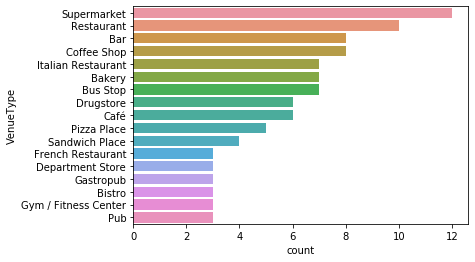

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = venues_Groningen.groupby("VenueType").filter(lambda x: len(x) > 2)


chart = sns.countplot(
    data=df2,
    order = df2['VenueType'].value_counts().index,
    y ='VenueType')

